<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/lab43_ridge_lasso_rev2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 슈퍼마켓 매출을 예측하는 선형모델 비교

## 데이터 받기
- 아래 사이트에서 로그인하고 register를 선택하면 데이터 다운로드 가능
- 데이터는 인도의 슈퍼마켓의 매출 기록 샘플이며 훈련데이터 8523개와 테스트 데이터 5681개를 제공함
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
- 훈련 데이터 사본: https://bit.ly/2HsDP2p
- 테스트 데이터 사본: https://bit.ly/2WgqtdO

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!curl -L https://bit.ly/2HsDP2p -o Train_UWu5bXk.txt
!curl -L https://bit.ly/2WgqtdO -o Test_u94Q5KV.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0   1896      0 --:--:-- --:--:-- --:--:--  1896
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  849k  100  849k    0     0   753k      0  0:00:01  0:00:01 --:--:-- 2490k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0   3295      0 --:--:-- --:--:-- --:--:--  3295
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  515k  100  515k    0     0   548k      0 --:--:-- --:--:-- --:--:-- 1195k


In [ ]:
# 슈퍼마켓 매출 데이터 읽기, 먼저 위의 사이트에 가서 등록을 하고 다운로드 받아야 함
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [ ]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [ ]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## 두 개의 입력 특성 사용
- 매장 개장 연도와 추천가격(Item_MRP)

In [ ]:
# 데이터 나누기
X, y = train.loc[:,['Outlet_Establishment_Year','Item_MRP']], train['Item_Outlet_Sales']

In [ ]:
# 선형회귀 모델
# 예측 특성으로 매장 개장 연도와 추천가격(Item_MRP) 두 개만 사용하는 경우

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse 출력
print(mse, mse**(0.5))
print(lreg.score(x_test, y_test))

1990314.4086564458 1410.7850327588699
0.3242020337746537


In [ ]:
lreg.coef_, x_train.columns

(array([-9.63343761, 15.64158088]),
 Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object'))

In [ ]:
# 선형모델 계수 출력

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


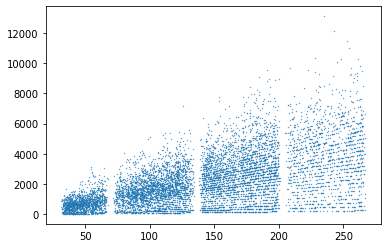

In [ ]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=0.1)

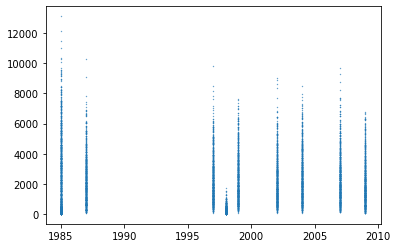

In [ ]:
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales, s=0.1)

- 매출이 설립된 연도에는 음의 관계,  상품가격에는 양의 관계.

In [ ]:
## 성능 평가 R squared
# 이 모델이 분산의 32%를 설명한다
lreg.score(x_test,y_test)

0.3242020337746537

## 데이터 전체 사용

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 무게를 평균치로 대체
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [ ]:
train.Item_Visibility.value_counts().head(10) # 상품의 가시성

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
Name: Item_Visibility, dtype: int64

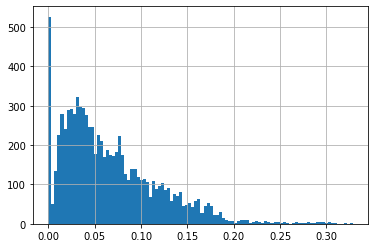

In [ ]:
train.Item_Visibility.hist(bins=100)

- 결측치는 아니지만 값이 0 이 많다. 실제로는 결측치로 보고 평균치로 대체

In [ ]:
# 0을 평균치로 대체
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

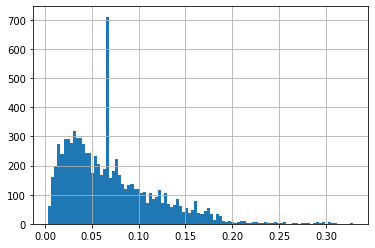

In [ ]:
train.Item_Visibility.hist(bins=100)

In [ ]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

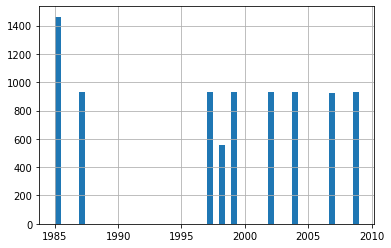

In [ ]:
train.Outlet_Establishment_Year.hist(bins=50)

- 설립연도보다는 설립연도 후 경과한 연수로 바꾸는 게 좋겠다.

In [ ]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

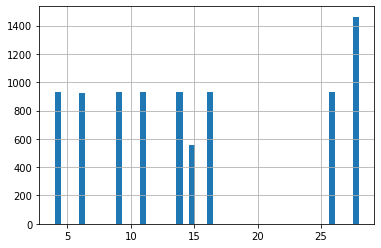

In [ ]:
train.Outlet_Establishment_Year.hist(bins=50)

In [ ]:
train.Outlet_Size.isnull().sum()

2410

In [ ]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- 결측치를 Small 매장으로 대체하겠다

In [ ]:
train['Outlet_Size'].fillna('Small',inplace=True) 

In [ ]:
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# 상품명은 분석에서 제외
train.drop("Item_Identifier", axis=1, inplace=True)

In [ ]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# 카테고리 변수 인코딩
# 먼저 타입이 cobjet인 카테고리 변수의 리스트를 만든다.
object_list = list(train.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
dummies = pd.get_dummies(train[object_list], prefix= object_list)

In [ ]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Fat_Content_low fat,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0


In [ ]:
# 원래의 열은 삭제하고 더미 변수 열을 추가한다.
X1 = train.drop(object_list, axis=1)

In [ ]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


In [ ]:
X1.shape

(8523, 5)

In [ ]:
X1, y = X1.drop('Item_Outlet_Sales',1), X1.Item_Outlet_Sales

In [ ]:
X1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,14
1,5.920,0.019278,48.2692,4
2,17.500,0.016760,141.6180,14
3,19.200,0.066132,182.0950,15
4,8.930,0.066132,53.8614,26
...,...,...,...,...
8518,6.865,0.056783,214.5218,26
8519,8.380,0.046982,108.1570,11
8520,10.600,0.035186,85.1224,9
8521,7.210,0.145221,103.1332,4


In [ ]:
# 스케일링을 하는 경우
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X = pd.concat([pd.DataFrame(X1),dummies], axis =1)

In [ ]:
dummies.shape, X1.shape, X.shape 

((8523, 41), (8523, 4), (8523, 45))

In [ ]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183922
0.3459348199771226


In [ ]:
# 45개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.9415317361227
0.5486538305100555


## 오차 플롯

- 예측값에 대해 오차의 발생 형태가 랜덤하지 않고 비선형 성분이 많이 들어 있다. 그림에서 양수, 음수 그대로 보임.

Text(0.5, 1.0, 'Residual plot')

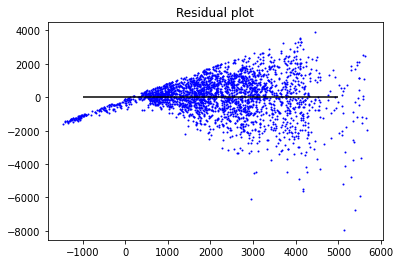

In [ ]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

- 전체 45개 특성 계수의 크기를 나열해 보자

In [ ]:
Series(lreg.coef_, index=X.columns)

0                                 -7.875144e-01
1                                 -6.452769e+00
2                                  9.788204e+02
3                                 -8.139013e+13
Item_Fat_Content_LF                9.020561e+13
Item_Fat_Content_Low Fat           9.020561e+13
Item_Fat_Content_Regular           9.020561e+13
Item_Fat_Content_low fat           9.020561e+13
Item_Fat_Content_reg               9.020561e+13
Item_Type_Baking Goods            -7.687484e+12
Item_Type_Breads                  -7.687484e+12
Item_Type_Breakfast               -7.687484e+12
Item_Type_Canned                  -7.687484e+12
Item_Type_Dairy                   -7.687484e+12
Item_Type_Frozen Foods            -7.687484e+12
Item_Type_Fruits and Vegetables   -7.687484e+12
Item_Type_Hard Drinks             -7.687484e+12
Item_Type_Health and Hygiene      -7.687484e+12
Item_Type_Household               -7.687484e+12
Item_Type_Meat                    -7.687484e+12
Item_Type_Others                  -7.687

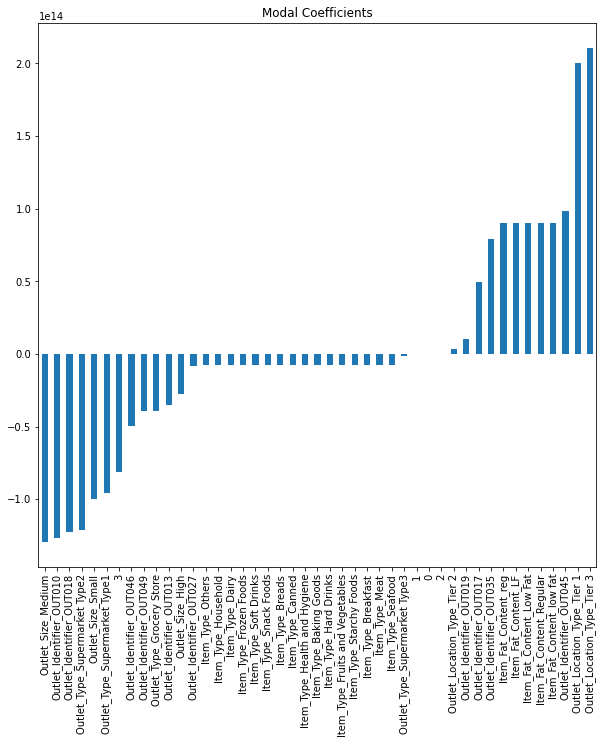

In [ ]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### 릿지 규제

In [ ]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1, normalize=True) 
# normalize: the regressors X will be normalized before regression by subtracting 
# the mean and dividing by the l2-norm
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1152.9415317361227, 0.5480928759746636)

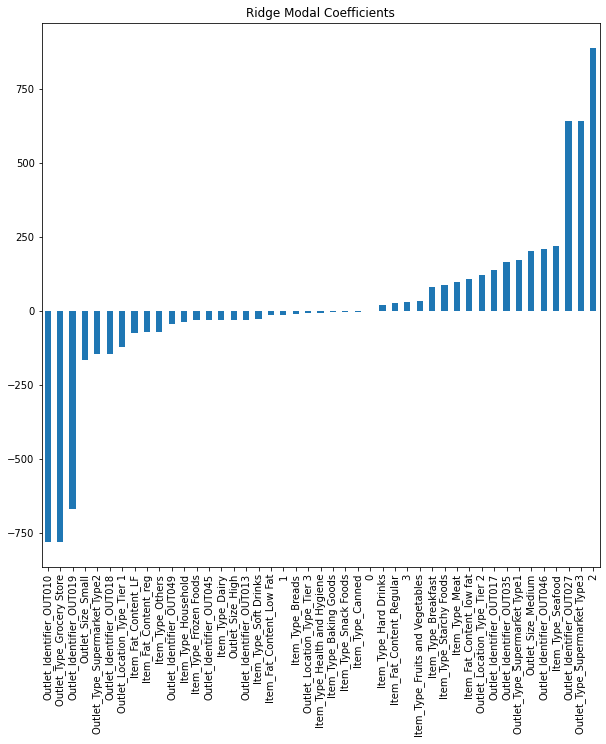

In [ ]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

### 위의 결과 -> 큰 계수의 값이 줄어듬 확인.

In [ ]:
alpha = [0, 0.001, 0.01, 0.05, 0.5, 1, 5]
for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train,y_train)
    print("a= %3f" % a, "R square = ", ridgeReg.score(x_train, y_train),
          '\t', ridgeReg.score(x_test, y_test))

a= 0.000000 R square =  0.5696145821626609 	 0.5486534404110446
a= 0.001000 R square =  0.5696142054709175 	 0.5486826382589223
a= 0.010000 R square =  0.5695775668066005 	 0.5489082444202531
a= 0.050000 R square =  0.5687567236716236 	 0.5491731608147645
a= 0.500000 R square =  0.5262751007295267 	 0.5137188639777166
a= 1.000000 R square =  0.4684628380624163 	 0.45920700914344165
a= 5.000000 R square =  0.23966067409572434 	 0.23617547945624906


## 라쏘 규제

In [ ]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5498557223521042


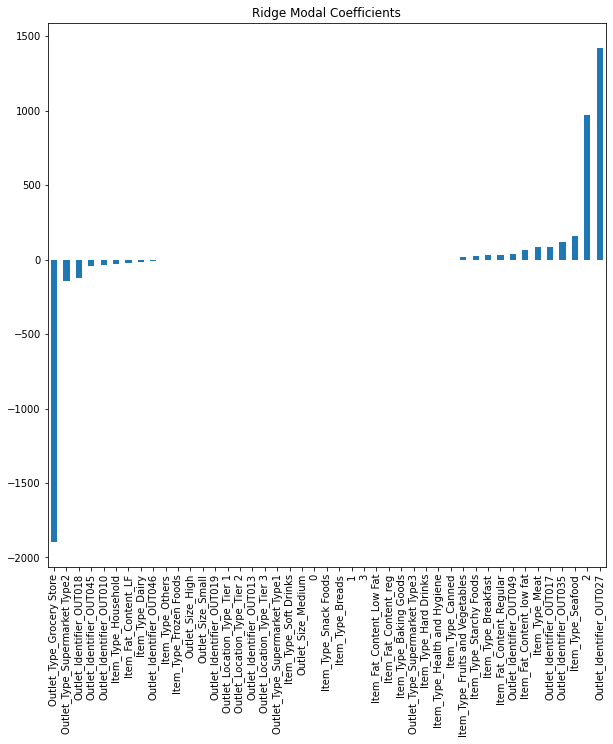

In [ ]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

In [ ]:
#### 결과 -> 중요도가 적은 계수의 크기가 줄어든 것 확인, 모델의 성능은 비슷

In [ ]:
alpha = [0, 0.001, 0.01, 0.05, 0.5, 1, 5]
for a in alpha:
    ridgeReg = Lasso(alpha=a, normalize=True, max_iter=3000)
    ridgeReg.fit(x_train,y_train)
    print("a= %3f" % a, "R square = ", ridgeReg.score(x_train, y_train),
          '\t', ridgeReg.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3719580850.142405, tolerance: 1728488.3251078317
  positive)


a= 0.000000 R square =  0.5696145821626609 	 0.5486534404110444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13857749.702571869, tolerance: 1728488.3251078317
  positive)


a= 0.001000 R square =  0.5696145238533095 	 0.5486696325448319
a= 0.010000 R square =  0.569608831244861 	 0.5488184100310158
a= 0.050000 R square =  0.5694844675705037 	 0.5493981055951234
a= 0.500000 R square =  0.5653991218584242 	 0.549002036572264
a= 1.000000 R square =  0.5593221175204617 	 0.5439764554634756
a= 5.000000 R square =  0.42032038068172917 	 0.41254196168233703


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(300)
rfr.fit(x_train,y_train)
rfr.score(x_test, y_test)

0.5506195364149531

In [ ]:
train = pd.read_csv('Train_UWu5bXk.txt')

train = train.drop(['Item_Weight', 'Outlet_Size'], axis=1)
train.drop("Item_Identifier", axis=1, inplace=True)
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

object_list = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[object_list], prefix= object_list)

X1 = train.drop(object_list, axis=1)

X1, y = X1.drop('Item_Outlet_Sales',1), X1.Item_Outlet_Sales

sc = StandardScaler()
X1 = sc.fit_transform(X1)

X = pd.concat([pd.DataFrame(X1),dummies], axis =1)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

lreg = LinearRegression()
lreg.fit(x_train,y_train)
print(lreg.score(x_test,y_test))

0.5700664628407877


In [ ]:

rfr = RandomForestRegressor(300)
rfr.fit(x_train,y_train)
rfr.score(x_test, y_test)

0.5737108101750377